In [1]:
import numpy as nmp
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

N = 100
alfa = 0.95
X = nmp.random.standard_cauchy(N)
z = sts.norm.ppf(0.5 + alfa / 2)
print("z = ", z)
d = 1 / (4 * (z ** 2))
print("sigma^2 = ", d)

z =  1.95996398454
sigma^2 =  0.0650794429068


Сопряженное распределениt - нормальное, $N(\alpha_0, \sigma^2_0)$. Найдем априорное, при котором $P(|\theta| < 0.5) = 0.95$. 

$\alpha_0 = 0$.

$P(-\frac{0.5}{\sigma_0} < \frac{\theta}{\sigma_0} < \frac{0.5}{\sigma_0}) = 0.95$

$z = \frac{0.5}{\sigma_0}$

$P(-z < \frac{\theta}{\sigma_0} < z) = 0.95$, где $z = 1.95996398454$

$\sigma^2_0 = \frac{1}{4z^2} = 0.0650794429068$

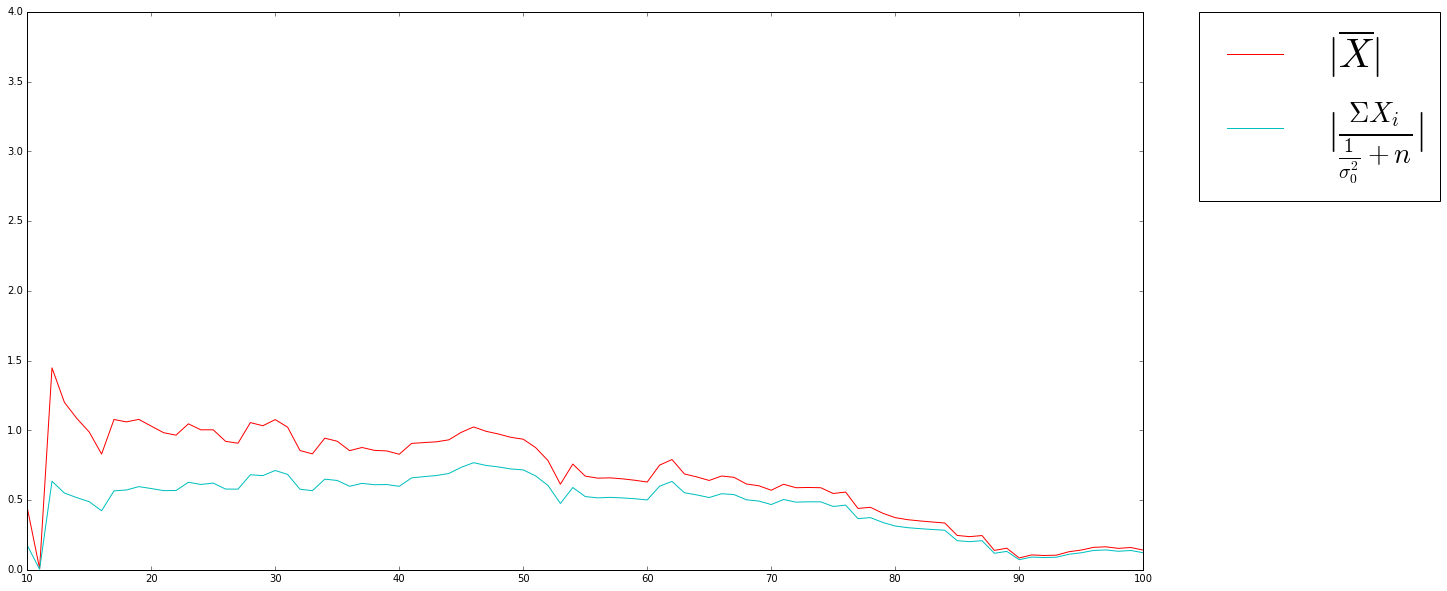

In [2]:
# считаем оценку максимального правдоподобия и байесовскую оценку
estimators = [((lambda x, n: nmp.mean(x)), r'\overline{X}', '-r'),
              ((lambda x, n: nmp.sum(x) / (1 / d + n)), r'\frac{\Sigma X_i}{\frac{1}{\sigma^2_0}+n}', '-c')]

# создаем двумерный массив
y = [0] * len(estimators)
for i in range(len(estimators)):
    y[i] = nmp.zeros(N)

#    считаем абсолютное отклонение оценок от реального значения
for n in range(1, N + 1):
    for i in range(len(estimators)):
        y[i][n - 1] = abs(estimators[i][0](X[:n], n))
        
axis_x = nmp.arange(1, N + 1, 1)

# выводим обое линии на график
fig = plt.figure(figsize=(20, 10))
for i in range(len(estimators)):
    plt.plot(axis_x, y[i], estimators[i][2], label=r'$|'+estimators[i][1]+r'|$')

plt.axis([10, N, 0, 4])
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, prop={'size':40}, borderaxespad = 0.)
plt.show()

$\overline X$ - оценка максимального правдоподобия для $N(\theta, 1)$. 

Эта оценка неудачна, так как выборка сделана из стандартного распределения Коши, у которого не существует математического ожидания. Байесовская оценка лучше, но тоже очень плоха, так как график ведет себя так же, он лишь ближе к 0.